In [6]:
import tensorflow as tf

# GPU 사용 가능 여부 확인
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU를 사용합니다.")
    try:
        # 메모리 증가할당
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
else:
    print("GPU를 사용할 수 없으므로, CPU를 사용합니다.")

GPU를 사용할 수 없으므로, CPU를 사용합니다.


C:\Users\user\AppData\Local\Temp\ipykernel_30964\2171389053.py:10: DtypeWarning: Columns (4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./encoded_data.csv')
D:\ANACONDA3_ENVS\DR\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          37,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,257 (188.50 KB)

 Trainable params: 48,257 (188.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 272.8797 - mean_absolute_error: 14.8242 - val_loss: 45.4436 - val_mean_absolute_error: 6.2922
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59.1215 - mean_absolute_error: 5.9264 - val_loss: 19.3858 - val_mean_absolute_error: 4.0827
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 43.3287 - mean_absolute_error: 4.9549 - val_loss: 20.5985 - val_mean_absolute_error: 4.3142
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31.6796 - mean_absolute_error: 4.2153 - val_loss: 17.9153 - val_mean_absolute_error: 4.0769
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.0207 - mean_absolute_error: 3.9587 - val_loss: 17.5874 - val_mean_absolute_error: 4.0379
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.0134 - mean_absolute_error: 3.9081 - val_loss: 30.7102 - val_mean_absolute_error: 5.3988
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.3470 - mean_absolute_error: 3.

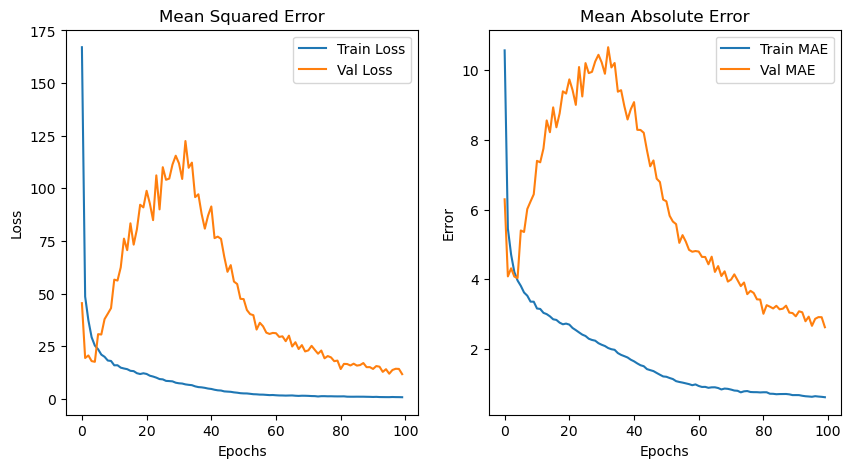

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 11.4354 - mean_absolute_error: 2.5404
Test Loss: 11.302290916442871
Test MAE: 2.5387675762176514
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 11.7169 - mean_absolute_error: 2.6468
Validation Loss: 11.72232723236084
Validation MAE: 2.626145839691162
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
R2 Score: 0.33923558505723994


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 데이터 로드
df = pd.read_csv('./encoded_data.csv')

# change_date 열을 제외한 나머지 열 선택
X = df.drop(columns=['change_date'])
y = df['change_date'].values  # 예측값

# 결측값 처리 (예: 평균값으로 대체)
X.replace('-', np.nan, inplace=True)
X = X.astype(np.float32)
X.fillna(X.mean(), inplace=True)

y = y.astype(np.float32)

# train/test 데이터셋 나누기 (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# train 데이터셋의 일부를 다시 train(sub)/val 데이터셋으로 나누기 (80% sub(train), 20% val)
X_sub, X_val, y_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

# 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_sub = scaler.transform(X_sub)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Sequential 모델 생성
# #@! Dropout 추가 - 하여 과적합 방지
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_dim=X.shape[1], activation='relu'),
    tf.keras.layers.Dropout(0.5),  # 50% 드롭아웃 추가
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # 50% 드롭아웃 추가
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# 회귀를 위한 손실 함수(mean squared error)와 메트릭스(mean absolute error) 사용하여 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# 모델 정보(요약) 확인
model.summary()

# 시드 값 설정
seed = 123
tf.random.set_seed(seed)
np.random.seed(seed)

# 모델 학습
history = model.fit(X_sub, y_sub, validation_data=(X_val, y_val), epochs=100, batch_size=100)

# 학습 결과 시각화 (학습 곡선 시각화)
plt.figure(figsize=(10, 5))

# subplot 1: Mean Squared Error 손실 함수의 변화
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# subplot 2: Mean Absolute Error 매트릭스의 변화
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()

plt.show()

# 모델 평가 - 테스트 데이터셋 사용
loss_test, mae_test = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss_test}')
print(f'Test MAE: {mae_test}')

# 모델 평가 - 검증 데이터셋 사용
loss_val, mae_val = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss_val}')
print(f'Validation MAE: {mae_val}')

# 예측값 생성
predictions = model.predict(X_val)

# 결정계수 계산
r2 = r2_score(y_val, predictions)
print(f'R2 Score: {r2}')

In [ ]:
## 학습 곡선 시각화
## 학습 과정에서의 손실과 정확도의 변화를 시각화하여
## 드롭아웃0.5 두부분 추가 과소적합 확인 판단할 수 있습니다